## Analyzing heating events at Artisan's Asylum

At Artisan's asylum, we'd been monitoring CO2 levels for a few weeks; data is here: [http://co2dataviz.pvos.org/data/brj93kvnkf6b/](http://co2dataviz.pvos.org/data/brj93kvnkf6b/)

We'd noticed particularly high CO2 levels.  A series of heating system failures led us to realize that the main source of the CO2 we were seeing was the heating system.  

![](img/heater_events.jpeg)

Based on the ventilation analysis suggested in [this twitter thread](https://twitter.com/Poppendieck/status/1366055149983076354), we attempt below to model several of these heating-system-failure events (labeled "A", "B", "C" above) with exponentials, in order to assess the time constant for the decay of CO2 over time. 

![](img/twitter_fit.png)

Some notes on the suggestions in the thread above:
- Avoid using the first 5 minutes after the initial decay onset
- Avoid using values below 600 ppm
- Assessing the time constant in units of hours results in a standardized measure of ventilation, the "air change per hour" (ACH).

![](img/ach_guidance.png)


## Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import numpy as np

In [2]:
feed_a_pubkey = "jdwktcu9xt5c" # wood shop
feed_b_pubkey = "b2srm27dragm" # front desk

# code below will plot the 'distance_meters' parameter from both of those feeds on the same chart
base_url = "http://co2data.pvos.org/data/"
feed_a_data = pd.read_csv(base_url+feed_a_pubkey+"/csv/")
feed_b_data = pd.read_csv(base_url+feed_b_pubkey+"/csv/")

x1=feed_a_data['created']
y1=feed_a_data['co2']

x2=feed_b_data['created']
y2=feed_b_data['co2']


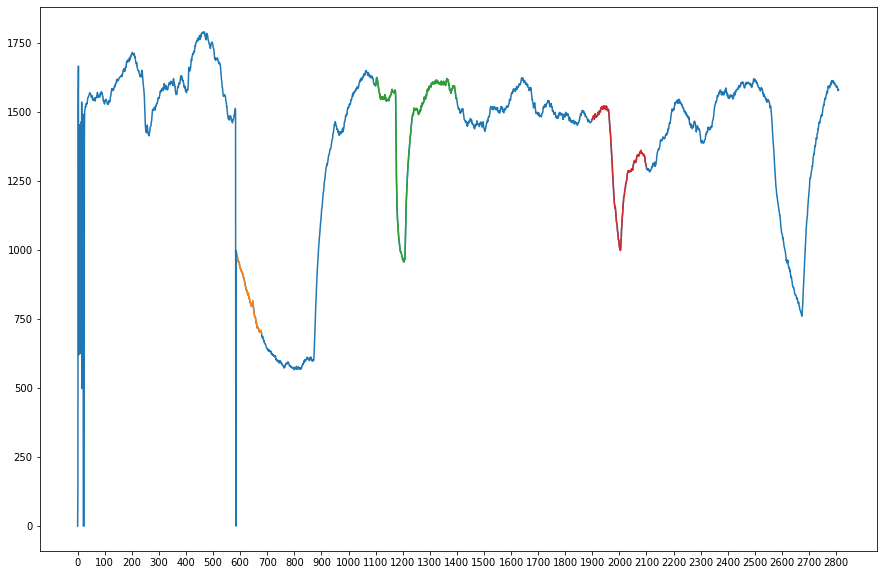

In [3]:
plt.figure(figsize=(15, 10))
plt.plot(y1)
plt.xticks(np.arange(0,len(y1),100))

event_a = y1[590:680]
plt.plot(event_a)

event_b = y1[1100:1400]
plt.plot(event_b)

event_c = y1[1900:2100]
plt.plot(event_c)
plt.show()



# Event A

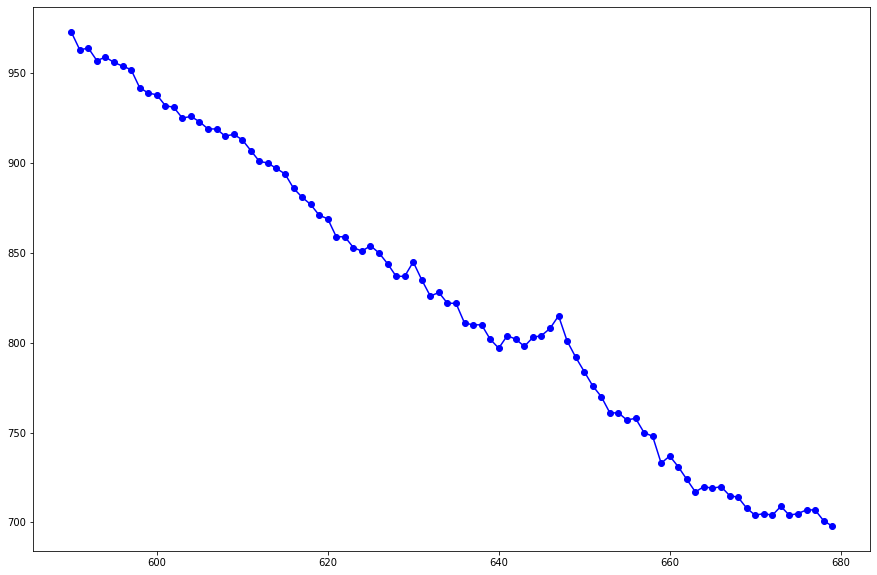

In [4]:
event=y1[590:680]
plt.figure(figsize=(15, 10))
#plt.xticks(np.arange(0,len(event_b),100))
plt.plot(event,'-bo')
plt.show()

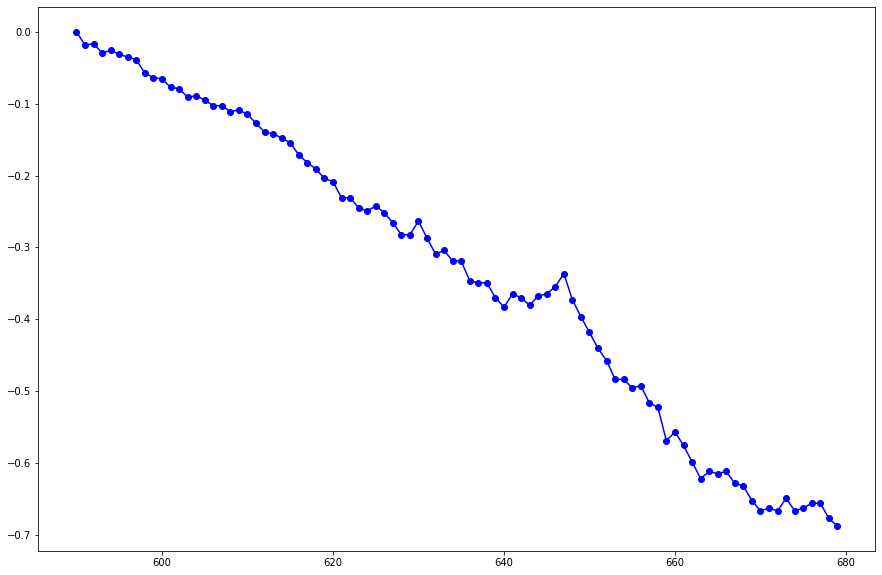

In [157]:
xmin = 590
xmax = 680
co2_outside=420
amplitude=y1[xmin]-co2_outside
event = np.log((y1[xmin:xmax]-co2_outside)/amplitude)
plt.figure(figsize=(15, 10))
#plt.xticks(np.arange(0,len(event_b),100))
#t = pd.Series(range(len(event_b)))*(5/60)
#plt.plot(t,event_b,'-bo')
plt.plot(event,'-bo')
#plt.plot(np.polyval(np.polyfit(t,event_b,1),t))
plt.show()

In [158]:
slope=-.37/((xmax-xmin)*5/60)
slope
slope2=-.35/((680-640)*5/60)
slope2

-0.10499999999999998

# Event B

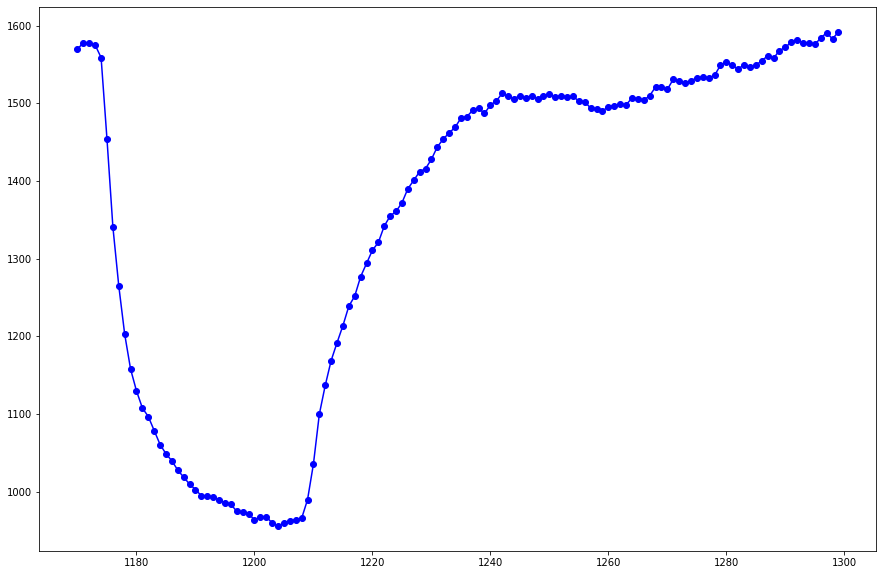

In [59]:
event_b = y1[1170:1300]
plt.figure(figsize=(15, 10))
#plt.xticks(np.arange(0,len(event_b),100))
plt.plot(event_b,'-bo')
plt.show()

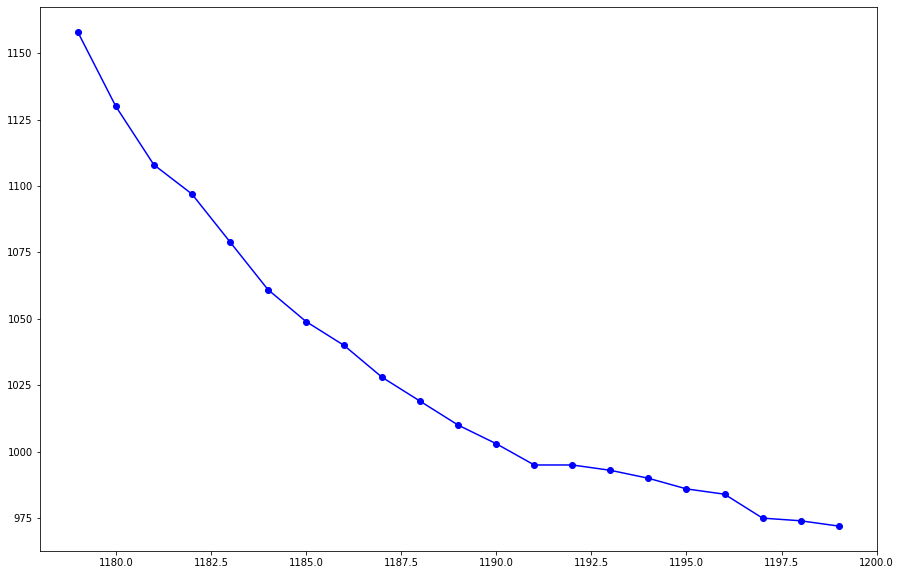

In [96]:
event_b = y1[1179:1200]
plt.figure(figsize=(15, 10))
#plt.xticks(np.arange(0,len(event_b),100))
plt.plot(event_b,'-bo')
plt.show()

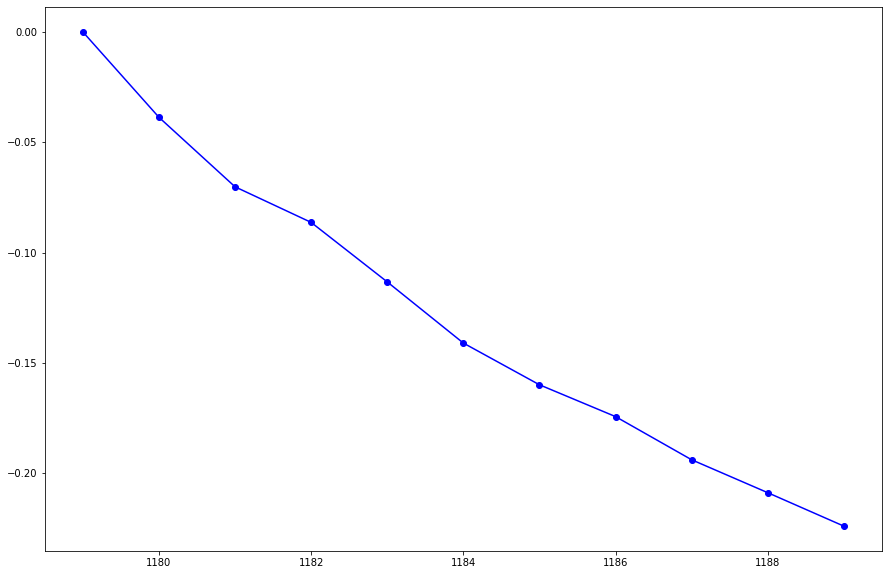

In [137]:
xmin = 1179
xmax = 1190
co2_outside=420
amplitude=y1[xmin]-co2_outside
event_b = np.log((y1[xmin:xmax]-co2_outside)/amplitude)
plt.figure(figsize=(15, 10))
#plt.xticks(np.arange(0,len(event_b),100))
#t = pd.Series(range(len(event_b)))*(5/60)
#plt.plot(t,event_b,'-bo')
plt.plot(event_b,'-bo')
#plt.plot(np.polyval(np.polyfit(t,event_b,1),t))
plt.show()

In [141]:
slope=-.22/((1188-1180)*5/60)
slope

-0.33

# Event C

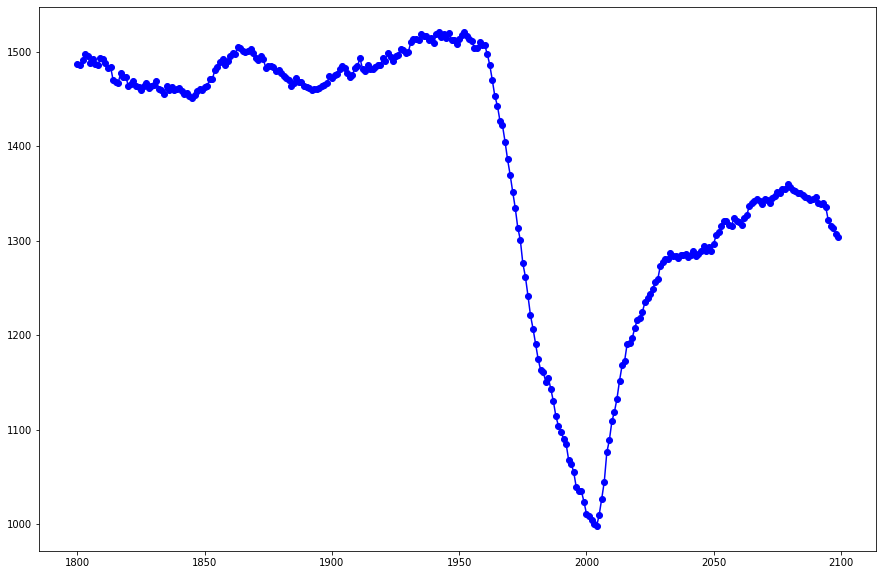

In [143]:
event_c = y1[1800:2100]
plt.figure(figsize=(15, 10))
#plt.xticks(np.arange(0,len(event_b),100))
plt.plot(event_c,'-bo')
plt.show()

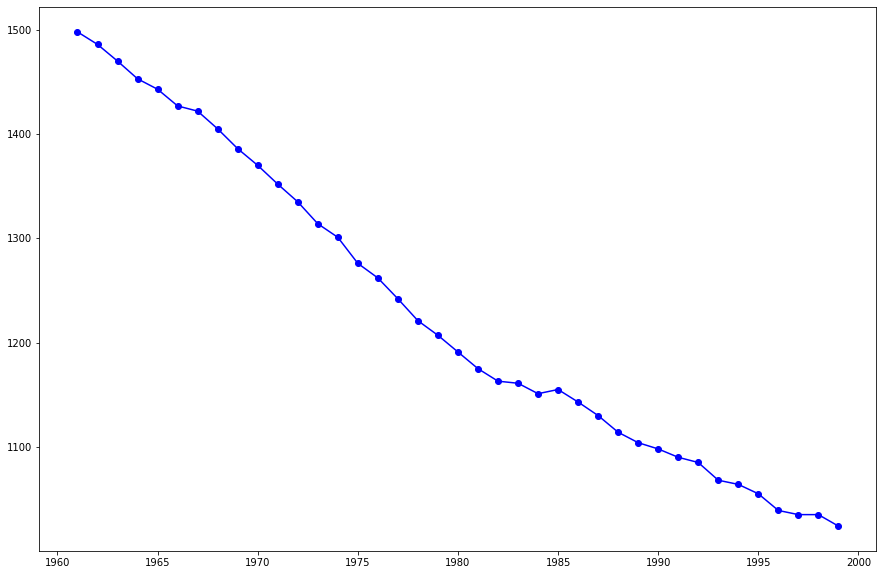

In [145]:
event_c = y1[1961:2000]
plt.figure(figsize=(15, 10))
#plt.xticks(np.arange(0,len(event_b),100))
plt.plot(event_c,'-bo')
plt.show()

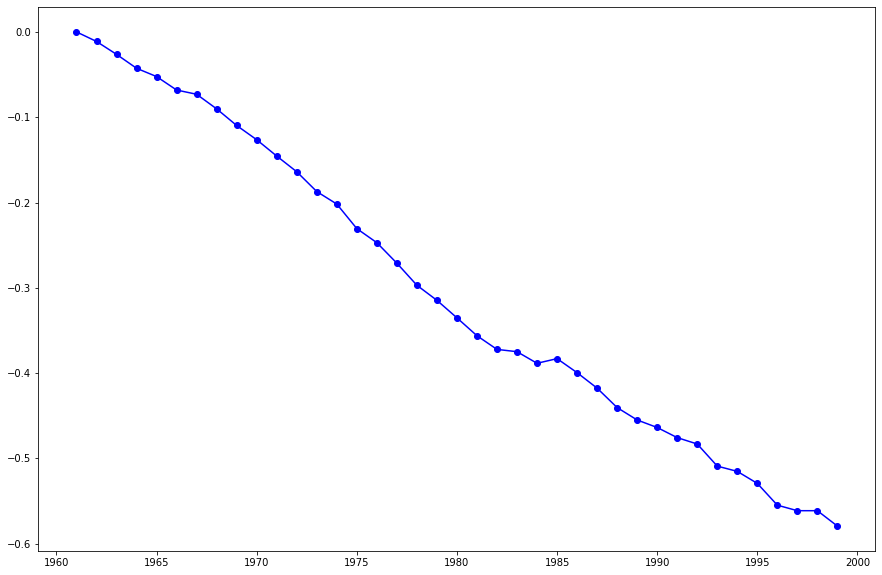

In [146]:
xmin = 1961
xmax = 2000
co2_outside=420
amplitude=y1[xmin]-co2_outside
event_c = np.log((y1[xmin:xmax]-co2_outside)/amplitude)
plt.figure(figsize=(15, 10))
#plt.xticks(np.arange(0,len(event_b),100))
#t = pd.Series(range(len(event_b)))*(5/60)
#plt.plot(t,event_b,'-bo')
plt.plot(event_c,'-bo')
#plt.plot(np.polyval(np.polyfit(t,event_b,1),t))
plt.show()

In [147]:
slope=-.6/((2000-1961)*5/60)
slope

-0.1846153846153846

## Addendum March 4

A new, very clean heating event just occurred yesterday:

![](img/heating_event_mar_03.png)

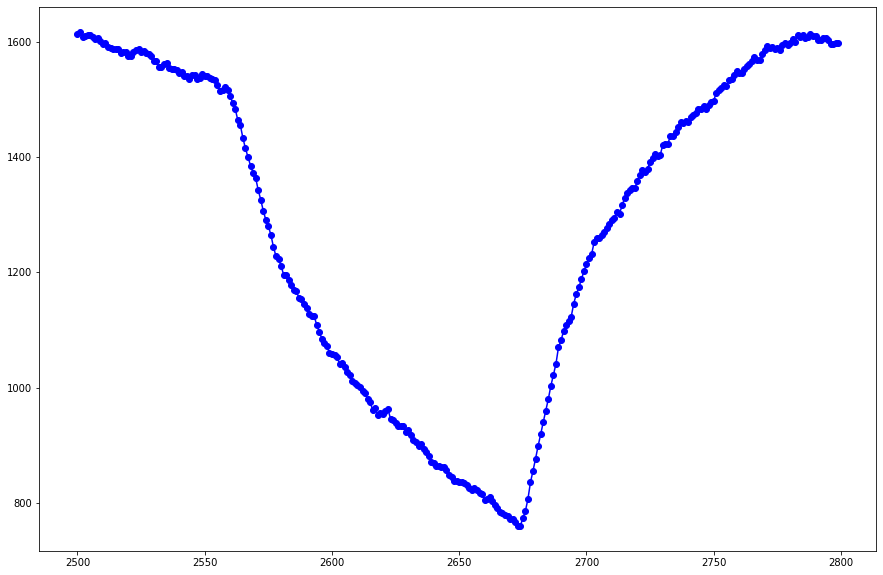

In [5]:
event=y1[2500:2800]
plt.figure(figsize=(15, 10))
#plt.xticks(np.arange(0,len(event_b),100))
plt.plot(event,'-bo')
plt.show()

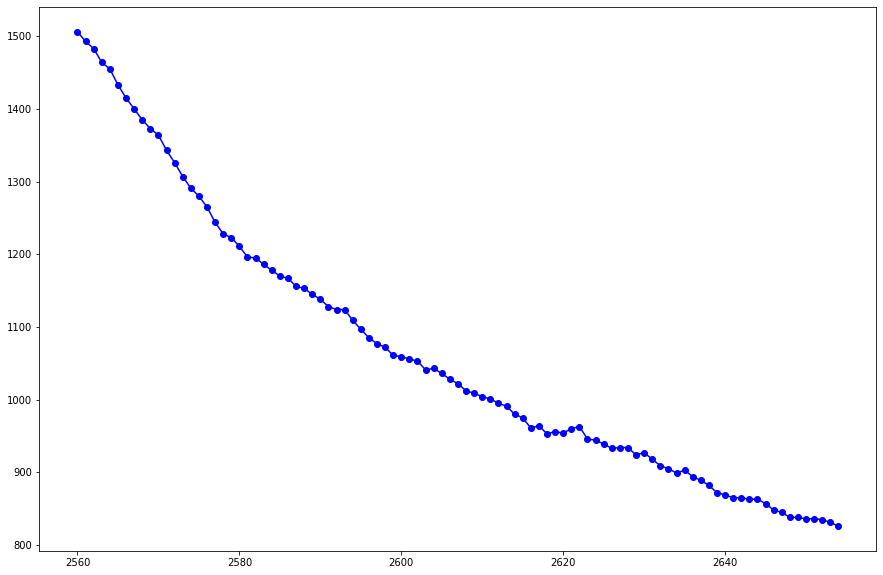

In [7]:
event=y1[2560:2655]
plt.figure(figsize=(15, 10))
#plt.xticks(np.arange(0,len(event_b),100))
plt.plot(event,'-bo')
plt.show()

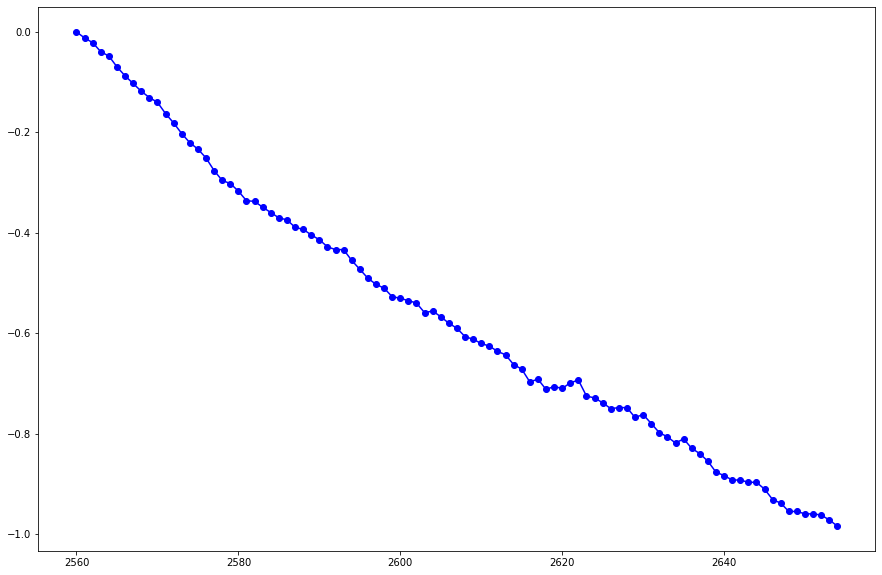

In [8]:
xmin = 2560
xmax = 2655
co2_outside=420
amplitude=y1[xmin]-co2_outside
event_slope = np.log((y1[xmin:xmax]-co2_outside)/amplitude)
plt.figure(figsize=(15, 10))
#plt.xticks(np.arange(0,len(event_b),100))
#t = pd.Series(range(len(event_b)))*(5/60)
#plt.plot(t,event_b,'-bo')
plt.plot(event_slope,'-bo')
#plt.plot(np.polyval(np.polyfit(t,event_b,1),t))
plt.show()

In [9]:
slope=-1.0/((xmax-xmin)*5/60)
slope

-0.12631578947368421